<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Distributions: Part II
              
</p>
</div>

Data Science Cohort Live NYC Feb 2022
<p>Phase 2: Topic 12</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

#### The normal distribution
- Why do people care so much about this distribution?

Sum of N independent, random variables each following same distribution:
$$ S = X_1 + X_2 + ... + X_N $$


Let each $X_i$ be the result of a Bernoulli trial:

<img src = "Images/simple_bernoulli.png" width = 500>

- $S$ would be how many steps right under $N$ trials.
- What kind of distribution?

Binomial!
3 trials.

In [1]:
from scipy.stats import binom
import matplotlib.pyplot as plt
N = 3
p = 0.5

pmf_binomial = [(x, binom.pmf(x, n = N, p = p)) 
                for x in range(0,10)]

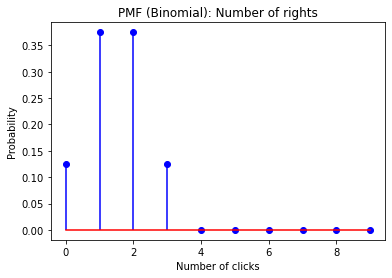

In [2]:
x,y = list(zip(*pmf_binomial))
plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Number of clicks')
plt.ylabel('Probability')
plt.title('PMF (Binomial): Number of rights')
plt.show()

Plot it for actual distance deviation:

$$ d = n_R - n_L = n_R - (N-n_r)$$

In [3]:
import numpy as np
N = 3
p = 0.5

pmf_deviation = [(x - (N - x), binom.pmf(x, n = N, p = p)) 
                for x in np.arange(-5,5,1)]

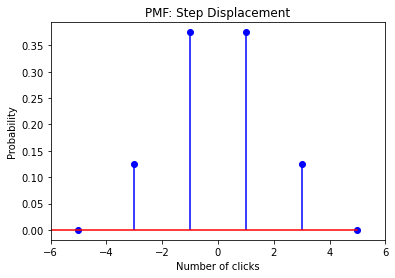

In [4]:
x,y = list(zip(*pmf_deviation))
plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Number of clicks')
plt.ylabel('Probability')
plt.title('PMF: Step Displacement')
plt.xlim(-6,6)
plt.show()

When $N$ gets sufficiently big:

In [5]:
from IPython.display import YouTubeVideo

galton_video = YouTubeVideo('Vo9Esp1yaC8', width = 800, height = 600)

In [6]:
display(galton_video)

- If make slits finer, and $N \rightarrow \infty$ :
- Histogram becomes the continuous normal pdf.

**Most distributions satisfying weak requirements**:
- Finite variance.
- Defined mean.

Bernoulli was an underlying distribution that satisfied this.

Sum of random variables drawn from these distribution follows normal distribution as N goes large.

#### Known as: The central limit theorem

Take N = 200 samples of waiting times of drivers at a toll:

- Follows exponential distribution with average wait time $\tau$
- Has finite variance $\tau^2$.

In [7]:
from scipy.stats import expon

#assume population mean 3 minutes
pop_mean = 3

wait_time_sample = expon.rvs(loc = pop_mean/2, scale = pop_mean/2, size = 50)

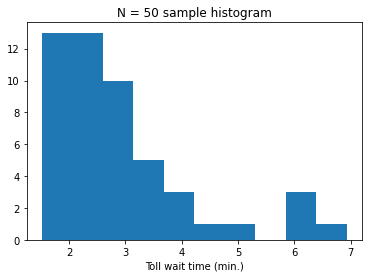

In [8]:
plt.hist(wait_time_sample)
plt.xlabel('Count')
plt.xlabel('Toll wait time (min.)')
plt.title('N = 50 sample histogram')
plt.show()


Obviously, not normal distributed.

- Want statistics/uncertainty of the **sample mean** as we repeat for many trials of samples with N = 50.

$$ \bar{T} = \frac{1}{N}\sum_{i=1}^{N}T_i $$

- Here N = 50
- Apart from factor of (1/N), this is a sum of random variables!

##### Create a list of 500 trials of these N = 50 samples from exponential distribution.

In [9]:
pop_mean = 3
many_sample_trials = [expon.rvs(loc = pop_mean/2, scale = pop_mean/2, size = 200) for trial in range(500)]
many_sample_trials[0:2]

[array([ 2.43286613,  4.5027285 ,  2.4669044 ,  2.53763821,  3.07670821,
         2.29632229,  3.45488405,  4.89989119,  1.73964035,  2.43453589,
         5.60136407,  1.96456916,  2.54212323,  1.89617266,  2.39183761,
         2.30710561,  7.98566234,  2.86193596,  2.86493316,  2.89447477,
         3.4009848 ,  1.53516923,  1.89975791,  3.66859733,  4.28683356,
         2.40662309,  4.21335388,  1.56084817,  1.95792806,  5.24122329,
         1.94262653,  3.92286256,  4.91934169,  4.07963446,  1.8803901 ,
         1.78811386,  2.89353787,  3.76829997,  6.6298754 ,  3.49727502,
         2.11445979,  1.58528124,  1.72258015,  9.71576335,  3.19041711,
         1.71728308,  2.44428917,  1.73449826,  4.88475428,  3.86407023,
         9.06358918,  2.1789011 ,  2.1589476 ,  2.64184341,  2.25095235,
         2.17422332,  3.47805329,  2.60931747,  3.03151471,  1.58701931,
         9.15980917,  2.33427392,  2.2743904 ,  1.57200229,  6.20783994,
         5.76185852, 11.99253951,  1.78371292,  2.9

Return list of sample means:

In [10]:
sample_mean_list = [sample.mean() for sample in many_sample_trials]

What does the distribution of means look like?

$$ \bar{T} = \frac{1}{N}\sum_{i=1}^{N}T_i $$

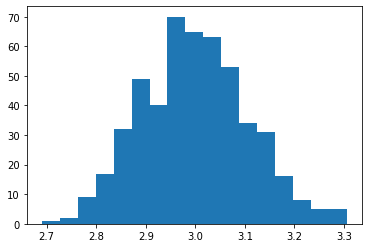

In [11]:
plt.hist(sample_mean_list, bins = "auto")
plt.show()

**The distribution of mean of a sample follow normal distribution**

- Regardless of underlying population distribution.

This is a very large reason why normal distribution is so important!

#### Standard Normal Distribution

- Often useful to rescale normal by mean/std.
- New rescaled normal has mean of 0 and variance of 1.
- Z-distribution.

We simply subtract the mean $\mu$ from each value and then divide by the standard deviation $\sigma$:

$$z = \frac{x - \mu}{\sigma}$$

We call this process **standardization**.

Mathematical form for pdf:
$$ N(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$

- $\mu$ is mean.
- $\sigma$ is standard deviation.

Scaled transformation:
$$ \frac{1}{\sqrt{2\pi}}e^{-\frac{z^2}{2}} $$

<center><img src = "Images/rescale_normal.png" width = 500></center>

#### $z$-Score

A **$z$-score** for a data point $x$ (in a normal distribution) is simply the distance to the mean in units of standard deviations

$$\large z = \frac{x - \mu}{\sigma}$$

By calculating the z-score of an individual point, we can see how unlikely a value is.

#### The Empirical Rule

- $68\%$ of the values of a normal distribution: lie within 1 standard deviation ($\sigma$) of the mean.
- $95\%$ within $2\sigma$.
- $99.7\%$ within $3\sigma$.  